In [1]:
import pandas as pd

In [12]:
steps=pd.read_csv("../data/scalati.csv.gz")

Da una breve analisi sui dati posso vedere che la remduration manca quasi sempre, mentre gli altri dati sul sonno sono presenti sempre in coppia

<Axes: >

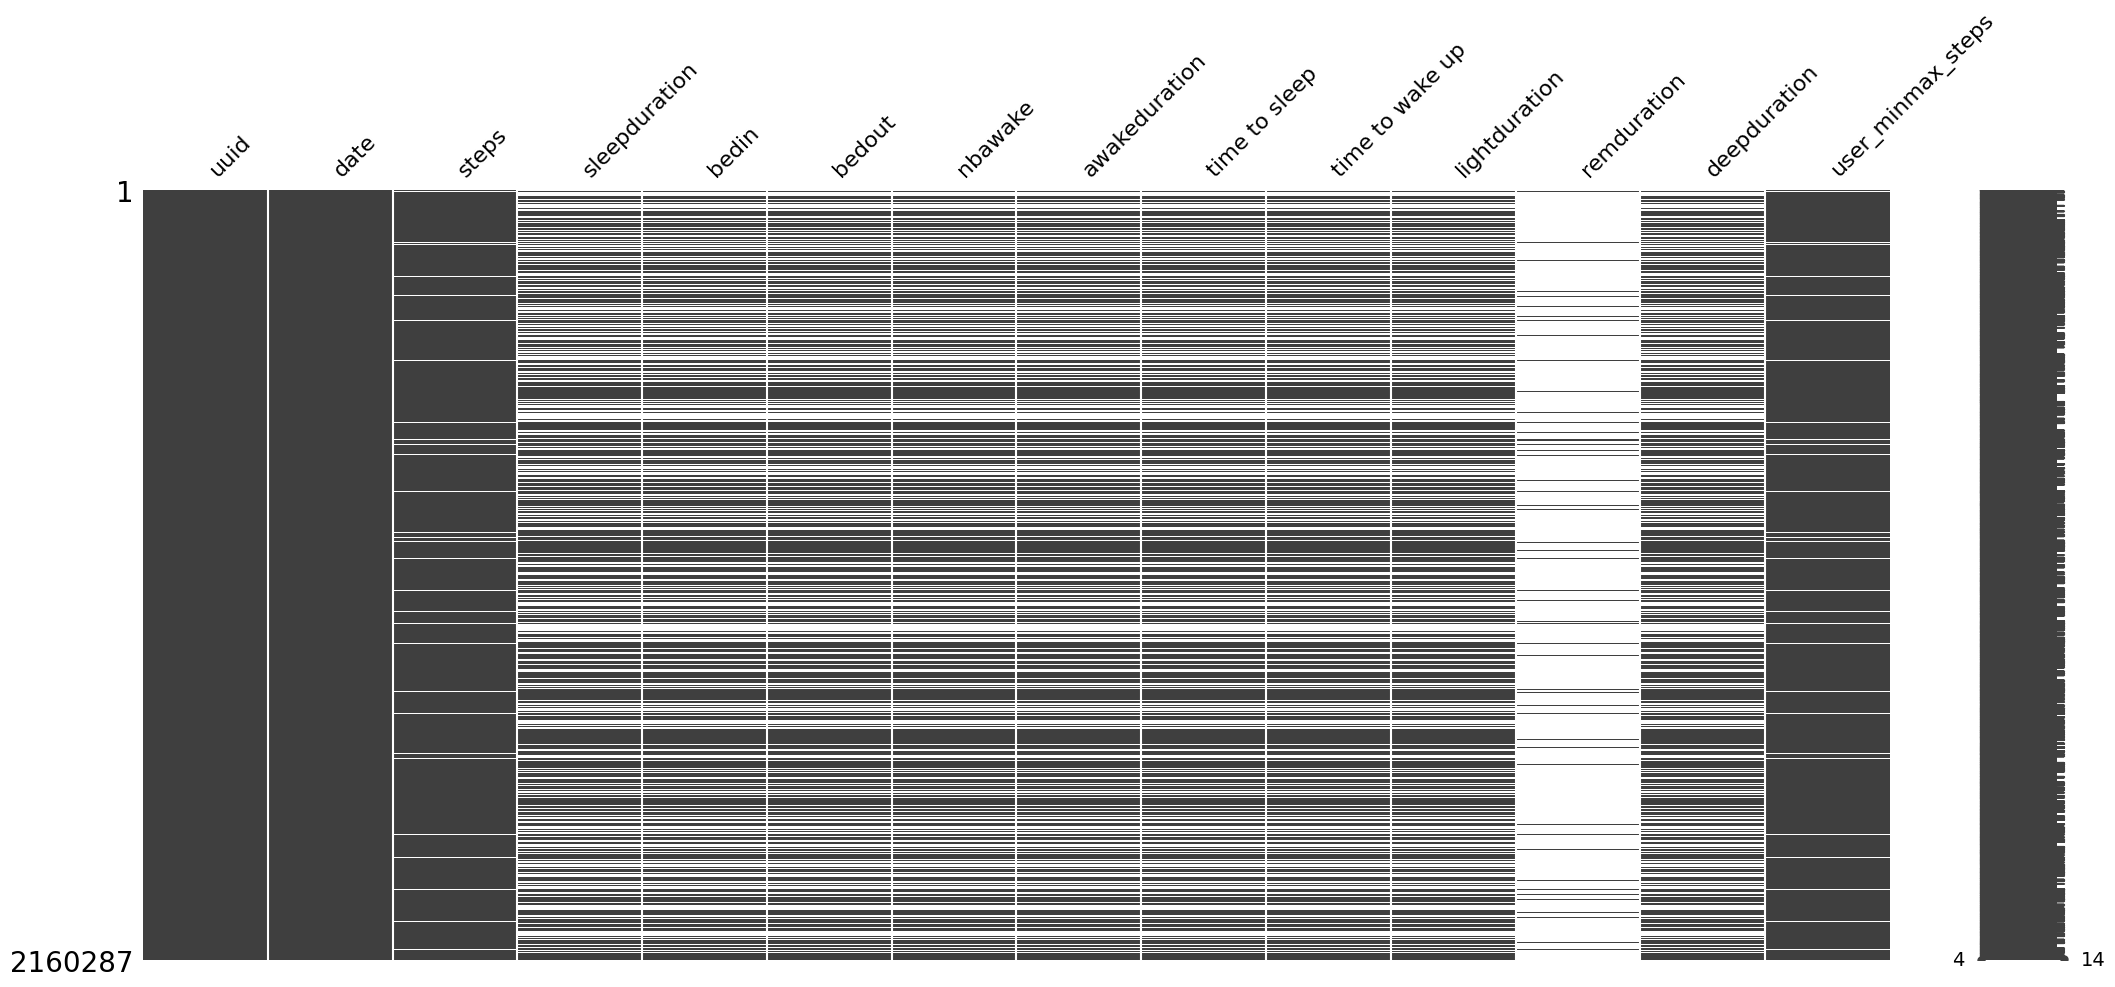

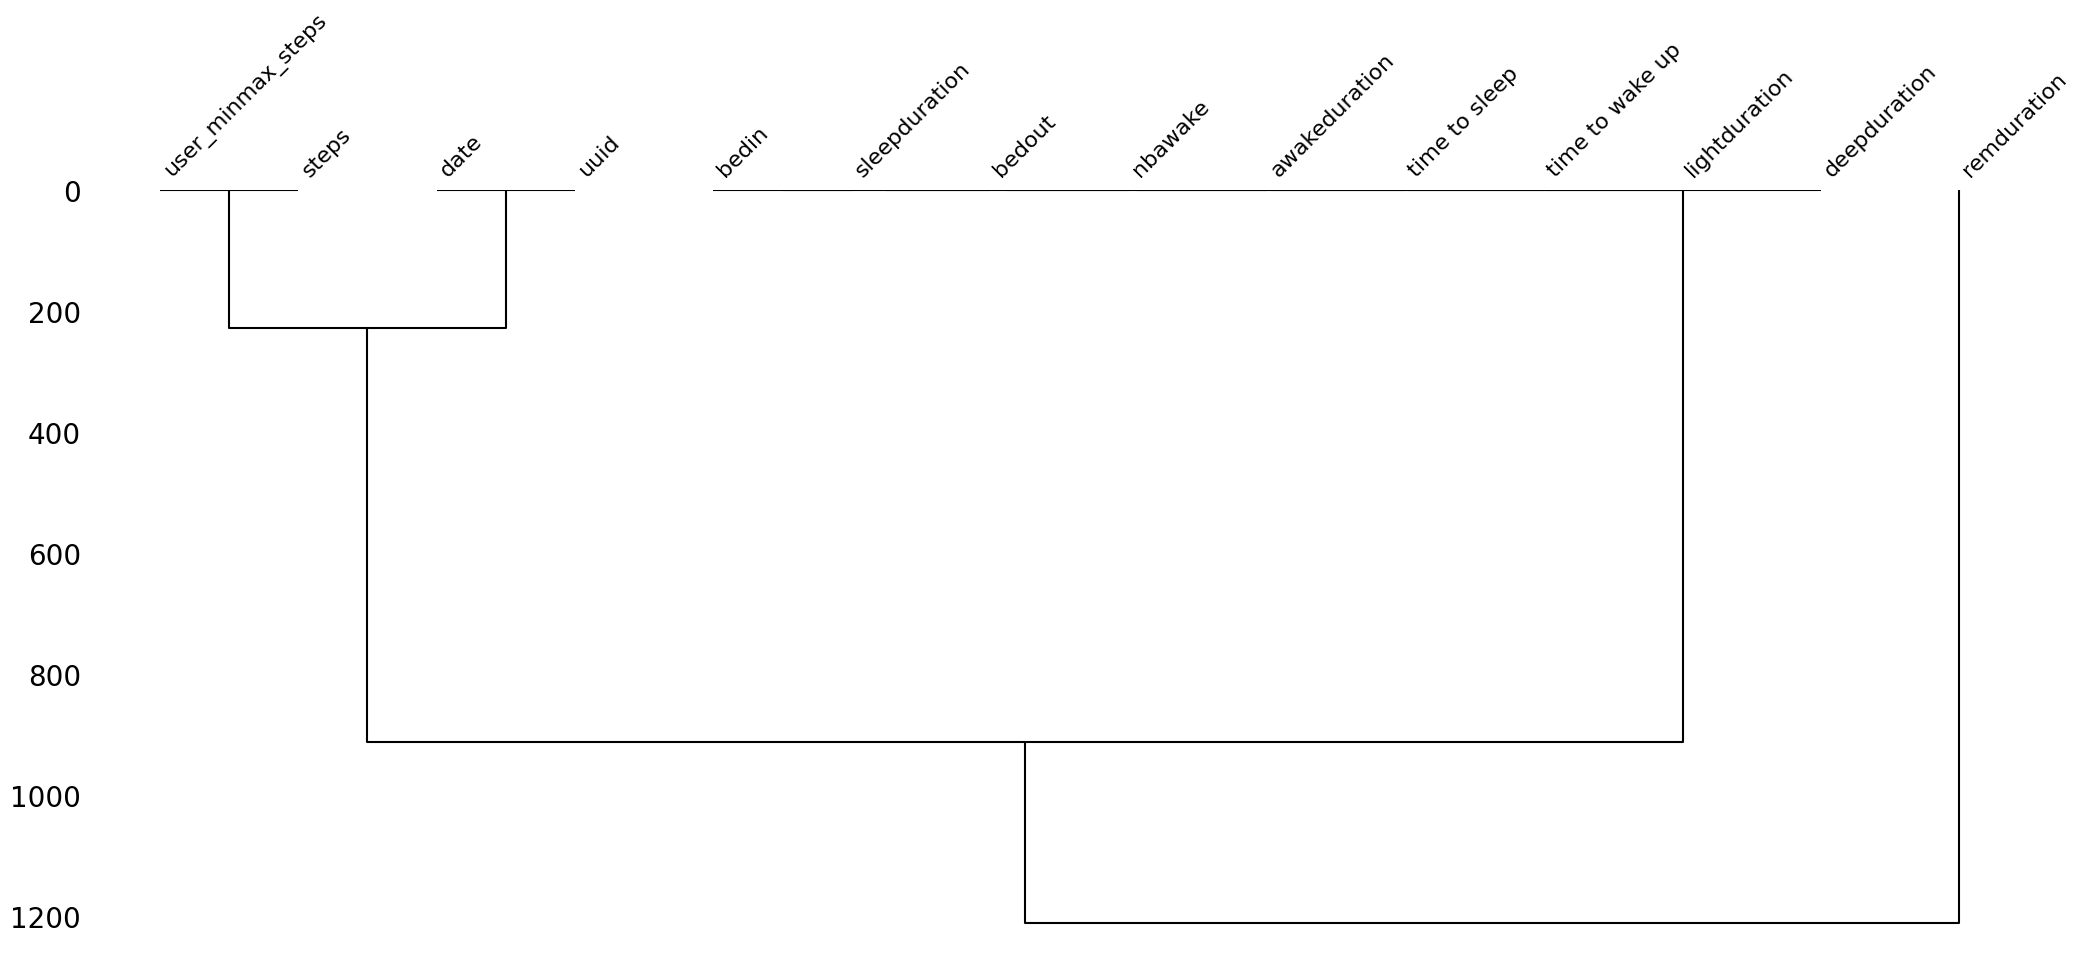

In [13]:
import missingno as msno

msno.matrix(steps)
msno.dendrogram(steps)

sleepduration 1.841994855248903


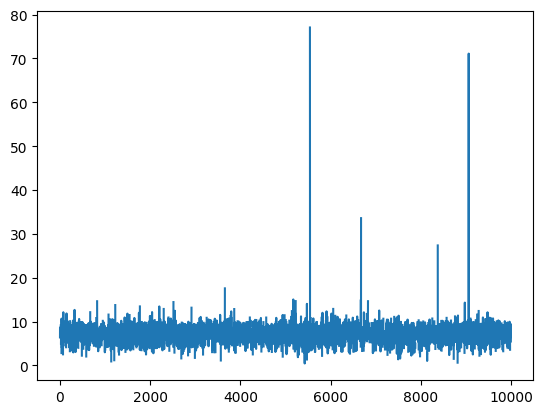

bedin 2.3754338026364565


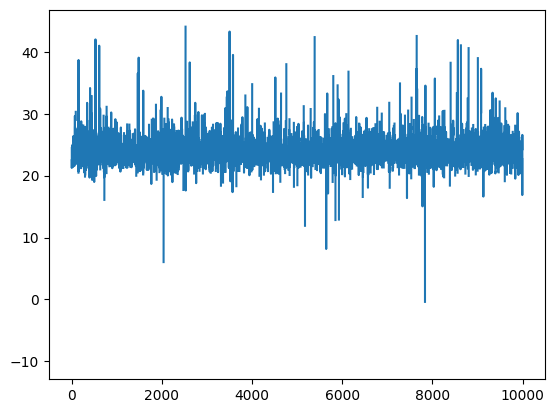

bedout 2.0789832902021823


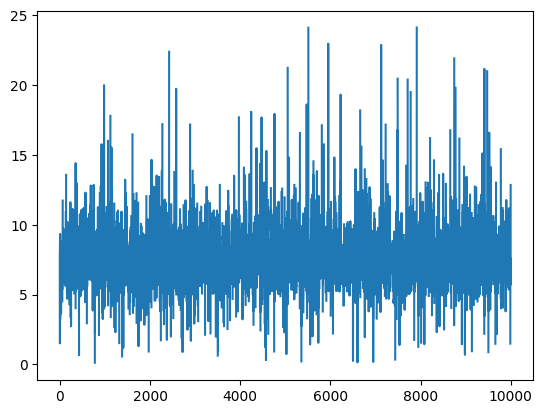

nbawake 2.0598534335657517


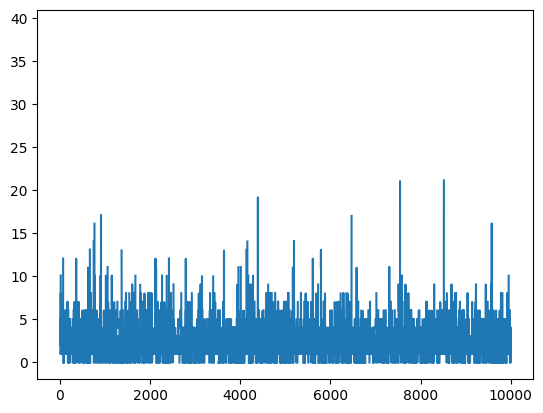

awakeduration 0.7864826654512131


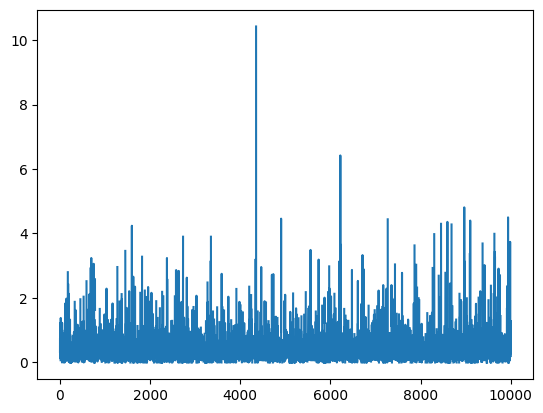

time to sleep 0.1934410906328128


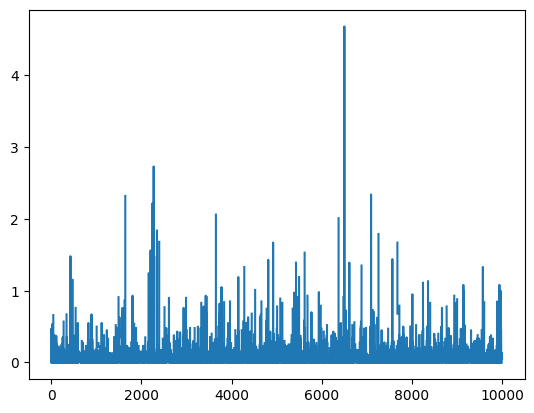

time to wake up 0.13262967346077847


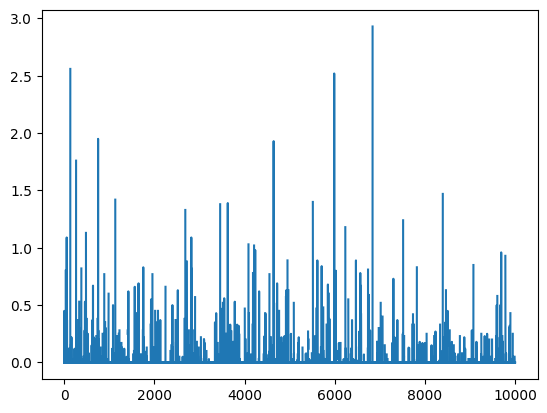

lightduration 1.3397442461169669


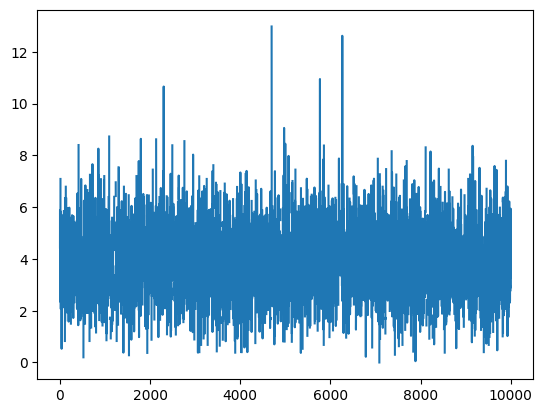

remduration 0.5506888166859409


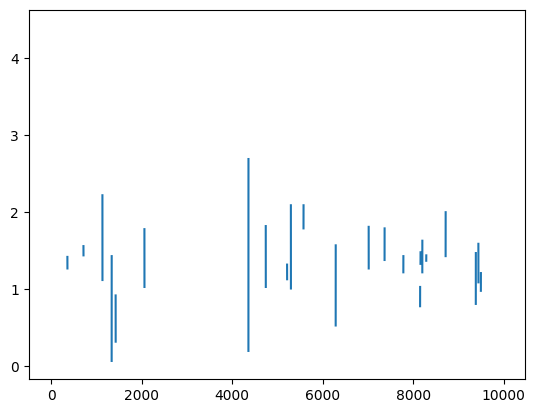

deepduration 1.3897766096041766


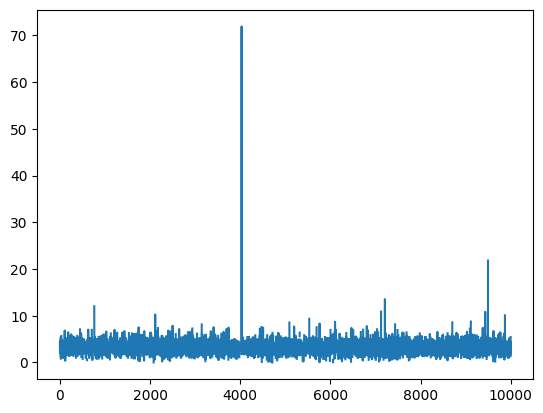

In [17]:
import matplotlib.pyplot as plt

for feature in steps.columns[3:-1]:
    plt.plot(steps[[feature]].sample(10000).values)
    print(feature,steps[feature].std())
    plt.show()
    plt.close()

Tra le feature che vale la pena utilizzare, scelgo quelle indicate sotto perché possono essere usate intuitivamente per trovare un assegnare un punteggio alla qualità del sonno. Questa valutazione del sonno sembra abbastanza ragionevole

In [22]:
steps = pd.read_csv("../data/scalati.csv.gz")[
    ["uuid", "date", "user_minmax_steps", 'sleepduration', 'lightduration', 'deepduration']].dropna() # Il dataset qui è abbastanza denso, per ora può andare bene eliminare le righe con valori mancanti

In [24]:
def sleep_score(x):
    optimal_light_ratio = .5
    optimal_deep_ratio = .25
    
    # Penalità sul light sleep X Penalità sul deep sleep X Penalità sulla durata del sonno
    x["sleep_quality_score"] = (1 - abs(x["lightduration"] / x["sleepduration"] - optimal_light_ratio)) * (1 - abs(x["deepduration"] / x["sleepduration"] - optimal_deep_ratio)) * (1 - abs(x["sleepduration"] / 7.5 - 1))
    return x


steps = steps.transform(sleep_score)
steps.sample(10)

,uuid,date,user_minmax_steps,sleepduration,lightduration,deepduration,sleep_quality_score
1540322,bade70731207476516cf693986dd5eb4903f686e,2016-11-23,0.124113,6.20,4.24,1.98,0.627875
1718806,cedec3797360d0242d0619a1afa729f0cb37cf55,2016-11-23,0.421007,6.83,4.67,2.18,0.691909
1971777,ec25f81c16484bcec77ab854370edd35d82891fa,2016-04-07,0.286554,6.89,3.68,3.20,0.697052
1070653,86bb36344e0915c0c7bf2073e49eca7780183f28,2016-11-26,0.288461,6.60,3.21,3.41,0.636533
1932282,e7c326fbf59d95e43d34dd2727676fcdcaa1f48a,2017-03-29,0.794020,7.17,3.52,3.66,0.700591
660019,57dc0f25de6ec97ece214d0bc18ff7596e55a55f,2016-09-28,0.246207,7.45,4.64,2.80,0.761686
2114491,fb8424fba018aee4766d15856e9504f884be4906,2016-08-20,0.505203,9.15,6.08,3.04,0.598108
613849,529a002ee57baddbd5fe5ccad286800d94a31007,2016-08-15,0.347580,7.84,4.84,3.02,0.728711
1580237,beebc614ba29e227c1446ccbabb12fefb64a6872,2016-10-16,0.580307,11.51,4.45,7.03,0.263728
2089696,f8e54344a52a7fb783e187416799d21f22b96c1c,2016-08-15,0.150829,7.54,3.20,4.34,0.620096


In [25]:
steps=(steps[["uuid","date","user_minmax_steps","sleep_quality_score"]])
steps.head()

,uuid,date,user_minmax_steps,sleep_quality_score
1,1003e58667235e01b49008155604980b3900b00e,2016-08-01,0.239404,0.374103
4,1003e58667235e01b49008155604980b3900b00e,2016-08-04,0.123650,0.215298
10,1003e58667235e01b49008155604980b3900b00e,2016-08-10,0.407999,0.594053
15,1003e58667235e01b49008155604980b3900b00e,2016-08-15,0.480538,0.732081
25,1003e58667235e01b49008155604980b3900b00e,2016-09-01,0.091069,0.199874


In [26]:
steps[["uuid","date","user_minmax_steps","sleep_quality_score"]].to_csv("../data/valutati.csv.gz",compression="gzip", index=False)